# Genre Prediction based on [CMU Dataset ](https://www.kaggle.com/applecrazy/cmu-book-summary-dataset?)

In [2]:
# importing important libraries
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# importing the dataset. It is semi-cleaned already
df = pd.read_csv("./Data/db1.csv")

In [4]:
df.head()

,Title,Genres,Summary
0,Animal Farm,"['Roman à clef', 'Satire', ""Children's literat...",old major the old boar on the manor farm calls...
1,A Clockwork Orange,"['Science Fiction', 'Novella', 'Speculative fi...",alex a teenager living in near future england ...
2,The Plague,"['Existentialism', 'Fiction', 'Absurdist ficti...",the text of the plague is divided into five pa...
3,A Fire Upon the Deep,"['Hard science fiction', 'Science Fiction', 'S...",the novel posits that space around the milky w...
4,All Quiet on the Western Front,"['War novel', 'Roman à clef']",the book tells the story of paul b umer a germ...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12402 entries, 0 to 12401
Data columns (total 3 columns):
Title      12402 non-null object
Genres     12402 non-null object
Summary    12402 non-null object
dtypes: object(3)
memory usage: 145.4+ KB


In [6]:
# All genres are strings, but we want lists, so a manual function to do it
ans = []
for genres in df['Genres']:
    l = []
    a = [0]
    for i in range(len(genres)):
        if genres[i] == ',':
            a.append(i)
    a.append(len(genres)-1)
    for i in range(len(a)-1):
        start = a[i]
        end = a[i+1]
        while not ((ord(genres[start])>=65 and ord(genres[start])<=90) or (ord(genres[start])>=97 and ord(genres[start])<=122)):
            start+=1
        while not ((ord(genres[end])>=65 and ord(genres[end])<=90) or (ord(genres[end])>=97 and ord(genres[end])<=122)):
            end-=1
        text = genres[start:end+1]
        l.append(text)
    ans.append(l)
df['Genres'] = ans
df.head()

,Title,Genres,Summary
0,Animal Farm,"[Roman à clef, Satire, Children's literature, ...",old major the old boar on the manor farm calls...
1,A Clockwork Orange,"[Science Fiction, Novella, Speculative fiction...",alex a teenager living in near future england ...
2,The Plague,"[Existentialism, Fiction, Absurdist fiction, N...",the text of the plague is divided into five pa...
3,A Fire Upon the Deep,"[Hard science fiction, Science Fiction, Specul...",the novel posits that space around the milky w...
4,All Quiet on the Western Front,"[War novel, Roman à clef]",the book tells the story of paul b umer a germ...


Exploring the genres

In [7]:
genres = [] 
for i in df['Genres']:
    for j in i:
        genres.append(j)

In [8]:
len(set(genres))

227

In [9]:
all_genres = nltk.FreqDist(genres) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})

In [10]:
all_genres_df

,Genre,Count
0,Roman à clef,29
1,Satire,118
2,Children's literature,2070
3,Speculative fiction,4197
4,Fiction,4648
...,...,...
222,New York Times Best Seller list,1
223,Epic Science Fiction and Fantasy,1
224,Alien invasion,1
225,Prose,4


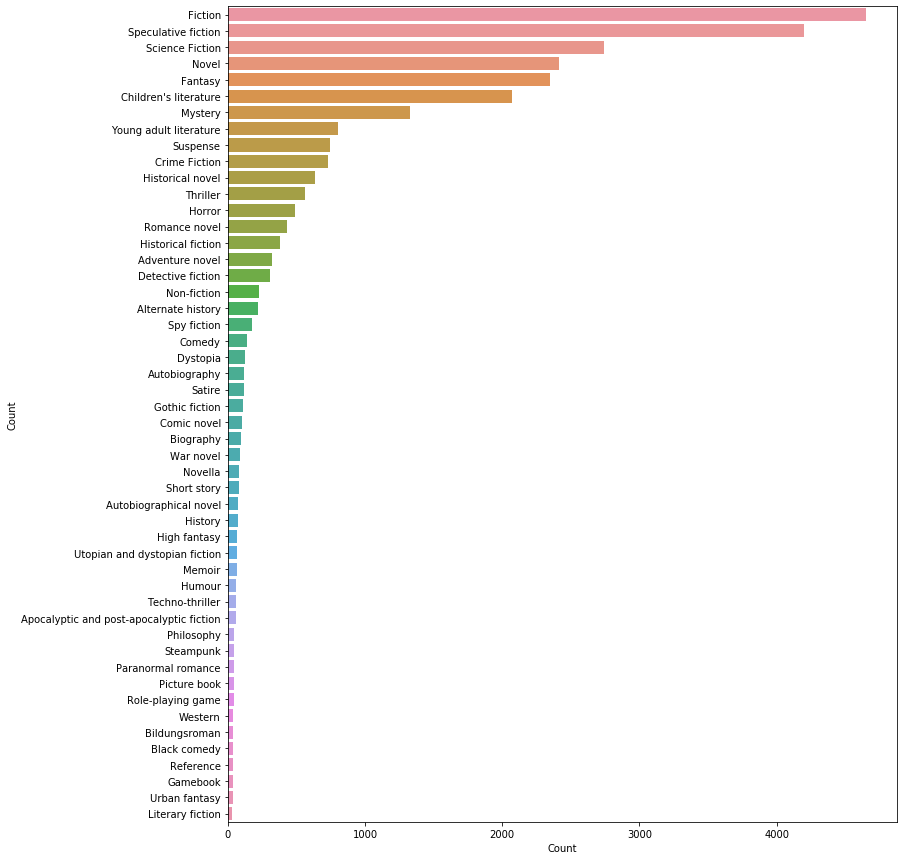

In [11]:
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

In [12]:
redundant=list(all_genres_df[all_genres_df['Count']<3]['Genre'])

In [13]:
def remove_redundant(arr):
    brr=[]
    for i in arr:
        if i not in redundant:
            brr.append(i)
    return brr

In [14]:
df['Genres']=df['Genres'].apply(remove_redundant)

In [15]:
Genres_per_book=[]
for i in df['Genres']:
    Genres_per_book.append(len(i))

In [16]:
len(set(Genres_per_book))

11

In [17]:
Genres_per_book_freq = nltk.FreqDist(Genres_per_book) 

# create dataframe
Genres_per_book_df = pd.DataFrame({'Number of Genres/book': list(Genres_per_book_freq.keys()), 
                              'Count': list(Genres_per_book_freq.values())})

In [18]:
Genres_per_book_df=Genres_per_book_df.sort_values('Number of Genres/book')
Genres_per_book_df=Genres_per_book_df.reset_index(drop=True) 
Genres_per_book_df

,Number of Genres/book,Count
0,0,12
1,1,4360
2,2,3387
3,3,2221
4,4,1391
5,5,643
6,6,255
7,7,95
8,8,28
9,9,9


In [19]:
#Removing the books with no genre
def count(arr):
    return len(arr)

In [20]:
df=df[df['Genres'].apply(count) != 0]

In [21]:
Genres_per_book_df.drop([0],inplace=True)

In [22]:
Genres_per_book_df

,Number of Genres/book,Count
1,1,4360
2,2,3387
3,3,2221
4,4,1391
5,5,643
6,6,255
7,7,95
8,8,28
9,9,9
10,11,1


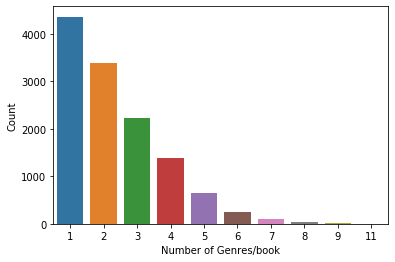

In [23]:
sns.barplot(data=Genres_per_book_df, x= "Number of Genres/book", y = "Count") 

Analysis of the summary

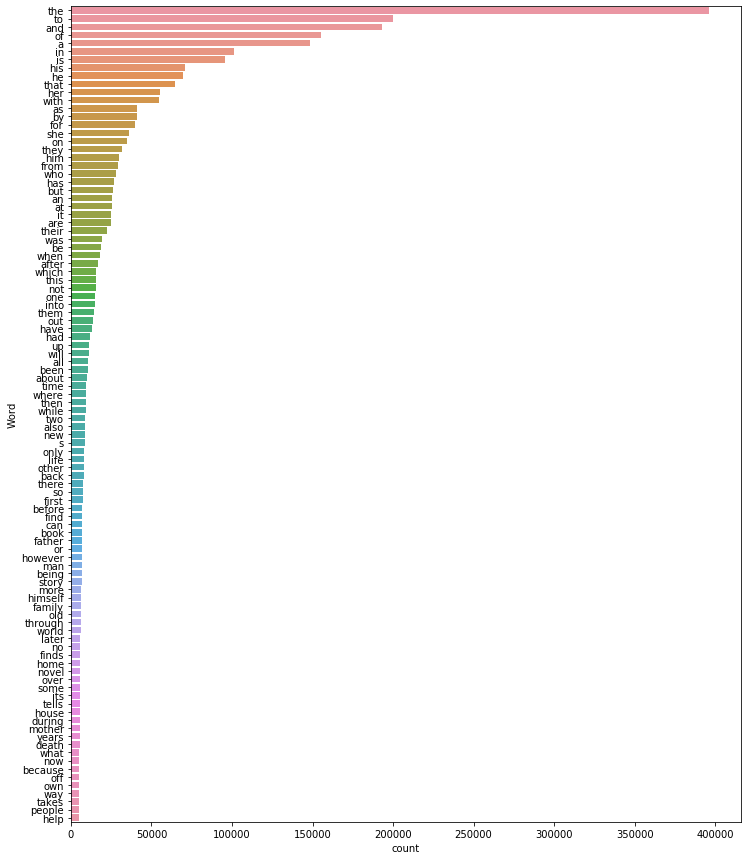

In [24]:
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x]) 
    all_words = all_words.split() 
    fdist = nltk.FreqDist(all_words) 
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
    d = words_df.nlargest(columns="count", n = terms) 
  
    # visualize words and frequencies
    plt.figure(figsize=(12,15)) 
    ax = sns.barplot(data=d, x= "count", y = "word") 
    ax.set(ylabel = 'Word') 
    plt.show()
  
# print 100 most frequent words 
freq_words(df['Summary'], 100)

In [25]:
# Most of the words are Stop-Words. Remove them
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

df['Summary'] = df['Summary'].apply(lambda x: remove_stopwords(x))

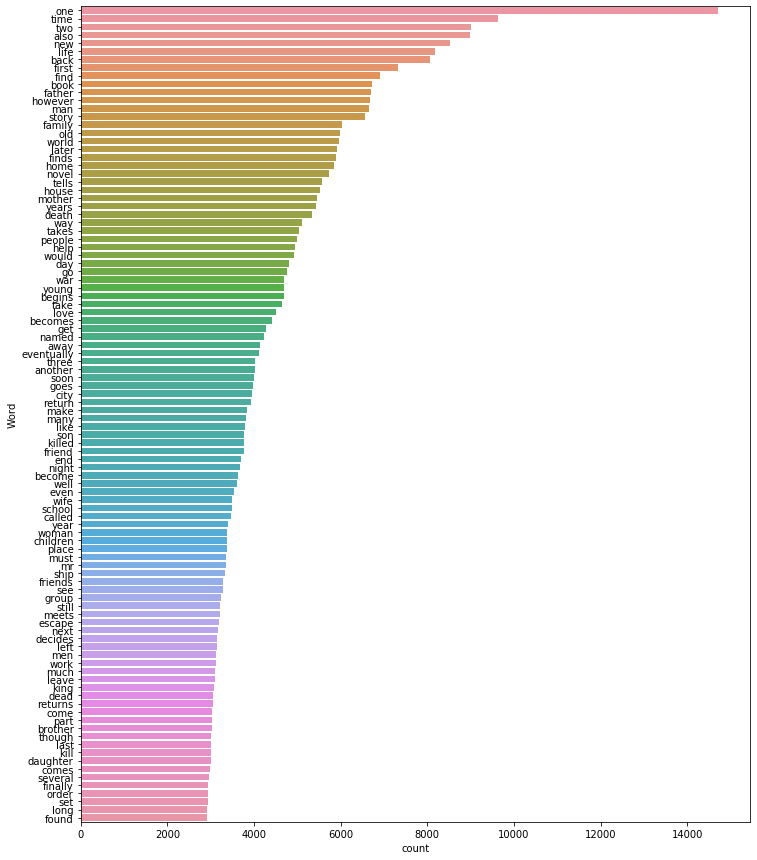

In [26]:
freq_words(df['Summary'], 100)

The words look more meaningful now

One hot encoding the target variable

In [27]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df['Genres'])

# transform target variable
y = multilabel_binarizer.transform(df['Genres'])
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [28]:
len(y),len(y[0])

(12390, 159)

There are 12390 rows with 159 distinct genres

Now, Splitting the data

In [29]:
xtrain, xt, ytrain, yt = train_test_split(df['Summary'], y, test_size=0.4,random_state=1)

In [30]:
xtest, xval, ytest, yval = train_test_split(xt, yt, test_size=0.5,random_state=1)

Checking if genres in ytrain

In [31]:
genre_dict={}
for i in range(len(ytrain[0])):
    s=0
    for j in range(len(ytrain)):
        s+=ytrain[j][i]
    genre_dict[str(i+1)]=s
genre_dict

{'1': 18,
 '2': 19,
 '3': 204,
 '4': 119,
 '5': 4,
 '6': 2,
 '7': 30,
 '8': 49,
 '9': 75,
 '10': 30,
 '11': 9,
 '12': 67,
 '13': 21,
 '14': 10,
 '15': 3,
 '16': 2,
 '17': 9,
 '18': 1224,
 '19': 11,
 '20': 87,
 '21': 4,
 '22': 2,
 '23': 64,
 '24': 6,
 '25': 3,
 '26': 3,
 '27': 3,
 '28': 3,
 '29': 8,
 '30': 2,
 '31': 438,
 '32': 9,
 '33': 17,
 '34': 167,
 '35': 18,
 '36': 3,
 '37': 77,
 '38': 5,
 '39': 2,
 '40': 4,
 '41': 21,
 '42': 2,
 '43': 11,
 '44': 4,
 '45': 3,
 '46': 2,
 '47': 1394,
 '48': 4,
 '49': 3,
 '50': 2,
 '51': 2792,
 '52': 21,
 '53': 5,
 '54': 1,
 '55': 70,
 '56': 12,
 '57': 17,
 '58': 14,
 '59': 2,
 '60': 46,
 '61': 8,
 '62': 221,
 '63': 382,
 '64': 3,
 '65': 2,
 '66': 36,
 '67': 285,
 '68': 39,
 '69': 3,
 '70': 7,
 '71': 3,
 '72': 10,
 '73': 24,
 '74': 6,
 '75': 1,
 '76': 7,
 '77': 17,
 '78': 3,
 '79': 7,
 '80': 37,
 '81': 21,
 '82': 7,
 '83': 774,
 '84': 6,
 '85': 152,
 '86': 2,
 '87': 1442,
 '88': 45,
 '89': 12,
 '90': 31,
 '91': 10,
 '92': 4,
 '93': 35,
 '94': 3,
 '95

In [32]:
Genres_in_training_data = pd.DataFrame({'Genre_index': list(genre_dict.keys()), 
                              'Count': list(genre_dict.values())})

In [33]:
Genres_in_training_data

,Genre_index,Count
0,1,18
1,2,19
2,3,204
3,4,119
4,5,4
...,...,...
154,155,19
155,156,15
156,157,466
157,158,1


In [34]:
len(Genres_in_training_data[Genres_in_training_data['Count']==0])

0

There is no genre in traing data for which there is no book

In [5]:
import dill
dill.dump_session('notebook_env.db')

Creating Features of movie summaries

In [103]:
# create TF-IDF features
tfidf_vectorizer1 = TfidfVectorizer()
xtrain_tfidf1 = tfidf_vectorizer1.fit_transform(xtrain)
xtest_tfidf1 = tfidf_vectorizer1.transform(xtest)
xval_tfidf1 = tfidf_vectorizer1.transform(xval)
tfidf_vectorizer1

TfidfVectorizer()

In [3]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [106]:
# Logistic Regression with tfdif vectorizer
classifier_1 = OneVsRestClassifier(LogisticRegression())
classifier_1.fit(xtrain_tfidf1, ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [108]:
# make predictions for validation set
y_pred = classifier_1.predict(xval_tfidf1)
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [111]:
f1_score(yval, y_pred, average="micro")

0.28882377563834233

In [115]:
import dill
dill.dump_session('notebook_env.db')

In [1]:
import dill
dill.load_session('notebook_env.db')

The Accuracy of the model is quite low. Trying to tune in the hyperparameters

Trying to work with max_df during vectorization of features

In [5]:
# create TF-IDF features
tfidf_vectorizer2 = TfidfVectorizer(max_df=0.9)
xtrain_tfidf2 = tfidf_vectorizer2.fit_transform(xtrain)
xval_tfidf2 = tfidf_vectorizer2.transform(xval)
tfidf_vectorizer2

TfidfVectorizer(max_df=0.9)

In [6]:
# Logistic Regression with tfdif vectorizer
classifier_2 = OneVsRestClassifier(LogisticRegression())
classifier_2.fit(xtrain_tfidf2, ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [7]:
# make predictions for validation set
y_pred = classifier_2.predict(xval_tfidf2)

In [8]:
f1_score(yval, y_pred, average="micro")

0.28882377563834233

In [15]:
# create TF-IDF features
tfidf_vectorizer3 = TfidfVectorizer(max_df=0.5)
xtrain_tfidf3 = tfidf_vectorizer3.fit_transform(xtrain)
xval_tfidf3 = tfidf_vectorizer3.transform(xval)
tfidf_vectorizer3

TfidfVectorizer(max_df=0.5)

In [16]:
# Logistic Regression with tfdif vectorizer
classifier_3 = OneVsRestClassifier(LogisticRegression())
classifier_3.fit(xtrain_tfidf3, ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [17]:
# make predictions for validation set
y_pred = classifier_3.predict(xval_tfidf3)
f1_score(yval, y_pred, average="micro")

0.28854471885028604

Conclusion- Parameter Max_df doesn't have any effect in accuracy. Possible Reason is All the Stop-Words are already removed by nltk library.

Let's see if min_df parameter affects anything

In [37]:
# create TF-IDF features
tfidf_vectorizer4 = TfidfVectorizer(min_df=0.001)
xtrain_tfidf4 = tfidf_vectorizer4.fit_transform(xtrain)
xval_tfidf4 = tfidf_vectorizer4.transform(xval)
tfidf_vectorizer4

TfidfVectorizer(min_df=0.001)

In [38]:
# Logistic Regression with tfdif vectorizer
classifier_4 = OneVsRestClassifier(LogisticRegression())
classifier_4.fit(xtrain_tfidf4, ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [39]:
# make predictions for validation set
y_pred = classifier_4.predict(xval_tfidf4)
f1_score(yval, y_pred, average="micro")

0.31684782608695655

Okay, We see some good results by ignoring the words present in less than 0.1% books out of 12390 Books. Let's increase the % to see its effect.

In [40]:
# create TF-IDF features
tfidf_vectorizer5 = TfidfVectorizer(min_df=0.01)
xtrain_tfidf5 = tfidf_vectorizer5.fit_transform(xtrain)
xval_tfidf5 = tfidf_vectorizer5.transform(xval)
tfidf_vectorizer5

TfidfVectorizer(min_df=0.01)

In [41]:
# Logistic Regression with tfdif vectorizer
classifier_5 = OneVsRestClassifier(LogisticRegression())
classifier_5.fit(xtrain_tfidf5, ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [42]:
# make predictions for validation set
y_pred = classifier_5.predict(xval_tfidf5)
f1_score(yval, y_pred, average="micro")

0.3362924281984334

Score Improves by ignoring 1% books out of 12390 Books. Let's increase further.

In [61]:
# create TF-IDF features
tfidf_vectorizer6 = TfidfVectorizer(min_df=0.02)
xtrain_tfidf6 = tfidf_vectorizer6.fit_transform(xtrain)
xval_tfidf6 = tfidf_vectorizer6.transform(xval)
tfidf_vectorizer6

TfidfVectorizer(min_df=0.02)

In [62]:
# Logistic Regression with tfdif vectorizer
classifier_6 = OneVsRestClassifier(LogisticRegression())
classifier_6.fit(xtrain_tfidf6, ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [63]:
# make predictions for validation set
y_pred = classifier_6.predict(xval_tfidf6)
f1_score(yval, y_pred, average="micro")

0.331304235202694

We see increasing the % from 1 to 2 decreases the accuracy. Let's just calculate accuracy for 4% and 10% to validate that accuracy decreases. 

In [64]:
# create TF-IDF features
tfidf_vectorizer7 = TfidfVectorizer(min_df=0.04)
xtrain_tfidf7 = tfidf_vectorizer7.fit_transform(xtrain)
xval_tfidf7 = tfidf_vectorizer7.transform(xval)
tfidf_vectorizer7

TfidfVectorizer(min_df=0.04)

In [65]:
# Logistic Regression with tfdif vectorizer
classifier_7 = OneVsRestClassifier(LogisticRegression())
classifier_7.fit(xtrain_tfidf7, ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [66]:
# make predictions for validation set
y_pred = classifier_7.predict(xval_tfidf7)
f1_score(yval, y_pred, average="micro")

0.32071097372488405

In [70]:
# create TF-IDF features
tfidf_vectorizer8 = TfidfVectorizer(min_df=0.1)
xtrain_tfidf8 = tfidf_vectorizer8.fit_transform(xtrain)
xval_tfidf8 = tfidf_vectorizer8.transform(xval)
tfidf_vectorizer8

TfidfVectorizer(min_df=0.1)

In [71]:
# Logistic Regression with tfdif vectorizer
classifier_8 = OneVsRestClassifier(LogisticRegression())
classifier_8.fit(xtrain_tfidf8, ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [72]:
# make predictions for validation set
y_pred = classifier_8.predict(xval_tfidf8)
f1_score(yval, y_pred, average="micro")

0.25013491635186186

In [73]:
min_df_dict={"0":round(0.28854471885028604*100,2),"0.1":round(0.31684782608695655*100,2),
             "1":round(0.3362924281984334*100,2), "2":round(0.331304235202694*100,2),
             "4": round(0.32071097372488405*100,2), "10": round(0.25013491635186186*100,2)}

In [74]:
# create dataframe
min_df_df = pd.DataFrame({'% min_df_parameter': list(min_df_dict.keys()), 
                              'Accuracy': list(min_df_dict.values())})
min_df_df

,% min_df_parameter,Accuracy
0,0,28.85
1,0.1,31.68
2,1,33.63
3,2,33.13
4,4,32.07
5,10,25.01


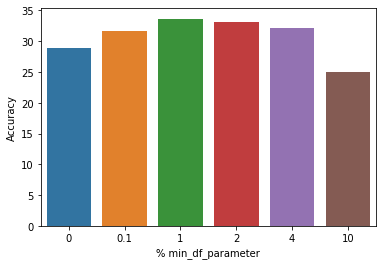

In [77]:
sns.barplot(y='Accuracy',x='% min_df_parameter',data=min_df_df,order=["0","0.1","1","2","4","10"])

Why ignoring words present in less than 1% of books increases the accuracy?
Explanation: There may be some typos in some books which are irrelevant plus there may be some slangs which have very less chances of coming in any other book. There is no relation between the genre and the typos/irrelevant words present in the books.
Why increasing % further more than 1 decreases accuracy?
Explanation: Further increasing the percentage may have drastic effects. The reason is that some low occuring words may highlight some specific features present in the summary of the book (differentiating factors).

We'll fix min_df=0.01 (1%) for further discussion and try to work with ngram_range parameter.

In [4]:
# create TF-IDF features
tfidf_vectorizer9 = TfidfVectorizer(min_df=0.01,ngram_range=(1,3))
xtrain_tfidf9 = tfidf_vectorizer9.fit_transform(xtrain)
xval_tfidf9 = tfidf_vectorizer9.transform(xval)
tfidf_vectorizer9

TfidfVectorizer(min_df=0.01, ngram_range=(1, 3))

In [5]:
# Logistic Regression with tfdif vectorizer
classifier_9 = OneVsRestClassifier(LogisticRegression())
classifier_9.fit(xtrain_tfidf9, ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [6]:
# make predictions for validation set
y_pred = classifier_9.predict(xval_tfidf9)
f1_score(yval, y_pred, average="micro")

0.3331154399267878

Accuracy more or less remains the same but we know using bi-grams/ tri-grams is always helpful and may show its cumulative effect after tuning in the hyperparameters of logistic regression. So, we'll include it.

In [4]:
# final tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=0.01,ngram_range=(1,3))
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)
tfidf_vectorizer

TfidfVectorizer(min_df=0.01, ngram_range=(1, 3))

Tuning in the C parameter in Logistic Regression

In [ ]:
# Logistic Regression with tfdif vectorizer
classifier_9 = OneVsRestClassifier(LogisticRegression())
classifier_9.fit(xtrain_tfidf9, ytrain)

In [25]:
C_dict={
        "training": {"C=0.1":0,"C=1":0,"C=2":0,"C=8":0},
        "validation": {"C=0.1":0,"C=1":0,"C=2":0,"C=8":0}
}

In [26]:
from datetime import datetime
start = datetime.now()
alpha=[0.1,1,2,8]
for j in alpha:
    classifier_10 = OneVsRestClassifier(LogisticRegression(C=j,max_iter=150))
    classifier_10.fit(xtrain_tfidf, ytrain)
    
    
    f1 = f1_score(ytrain, classifier_10.predict(xtrain_tfidf), average='micro')
    f2 = f1_score(yval, classifier_10.predict(xval_tfidf), average='micro')
    s="C="+str(j)
    C_dict["training"][s]=f1
    C_dict["validation"][s]=f2
    print("Micro-average quality numbers for C=",j)
    print(" F1-measure for train: {:.4f}".format( f1))
    print(" F1-measure for val: {:.4f}".format( f2))
print("Time taken to run this cell :", datetime.now() - start)

Micro-average quality numbers for C= 0.1
 F1-measure for train: 0.1228
 F1-measure for val: 0.1000
Micro-average quality numbers for C= 1
 F1-measure for train: 0.4516
 F1-measure for val: 0.3331
Micro-average quality numbers for C= 2
 F1-measure for train: 0.5444
 F1-measure for val: 0.3785
Micro-average quality numbers for C= 8
 F1-measure for train: 0.7399
 F1-measure for val: 0.4179
Time taken to run this cell : 0:01:02.014435


In [27]:
C_dict

{'training': {'C=0.1': 0.12277143162165045,
  'C=1': 0.45155300472653614,
  'C=2': 0.5443646975313511,
  'C=8': 0.7398990765850813},
 'validation': {'C=0.1': 0.1,
  'C=1': 0.3331154399267878,
  'C=2': 0.3785046728971963,
  'C=8': 0.41788057377960636}}

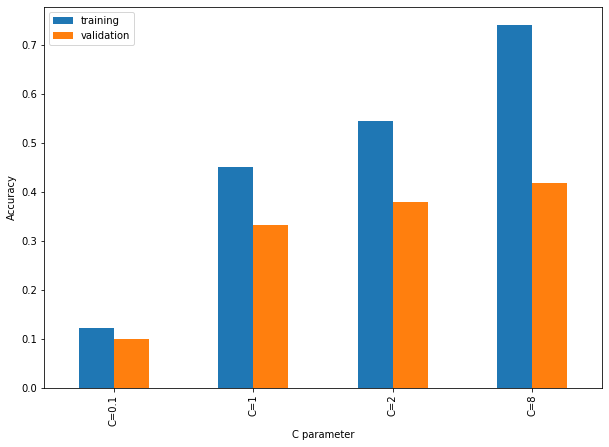

In [40]:
pd.DataFrame(C_dict).plot(kind='bar',figsize=(10,7))
plt.xlabel('C parameter')
plt.ylabel('Accuracy')
plt.show()

For C=8, we get maximum accuracy but here the training data is quite overfitted. So, it is better to take less value. C=2 looks perfect.

Exploring solvers liblinear and saga with penalties

In [12]:
# Logistic Regression with tfdif vectorizer
classifier_11 = OneVsRestClassifier(LogisticRegression(C=2,max_iter=200,solver='saga',penalty='l1'))
classifier_11.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression(C=2, max_iter=200,
                                                 penalty='l1', solver='saga'))

In [13]:
# make predictions for validation set
y_pred = classifier_11.predict(xval_tfidf)
f1_score(yval, y_pred, average="micro")

0.39981229469732515

In [14]:
# Logistic Regression with tfdif vectorizer
classifier_12 = OneVsRestClassifier(LogisticRegression(C=2,max_iter=200,solver='saga',penalty='l2'))
classifier_12.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression(C=2, max_iter=200,
                                                 solver='saga'))

In [15]:
# make predictions for validation set
y_pred = classifier_12.predict(xval_tfidf)
f1_score(yval, y_pred, average="micro")

0.3783185840707965

In [16]:
# Logistic Regression with tfdif vectorizer
classifier_13 = OneVsRestClassifier(LogisticRegression(C=2,max_iter=200,solver='liblinear',penalty='l1'))
classifier_13.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression(C=2, max_iter=200,
                                                 penalty='l1',
                                                 solver='liblinear'))

In [17]:
# make predictions for validation set
y_pred = classifier_13.predict(xval_tfidf)
f1_score(yval, y_pred, average="micro")

0.40014072944763696

In [18]:
# Logistic Regression with tfdif vectorizer
classifier_14 = OneVsRestClassifier(LogisticRegression(C=2,max_iter=200,solver='liblinear',penalty='l2'))
classifier_14.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression(C=2, max_iter=200,
                                                 solver='liblinear'))

In [19]:
# make predictions for validation set
y_pred = classifier_14.predict(xval_tfidf)
f1_score(yval, y_pred, average="micro")

0.37805927930143896

In [30]:
solver_dict={}
solver_dict["saga"]=[round(0.39981229469732515*100,2),round(0.3783185840707965*100,2)]
solver_dict["liblinear"]=[round(0.40014072944763696*100,2),round(0.37805927930143896*100,2)]

In [31]:
solver_df=pd.DataFrame(solver_dict)
solver_df.index=["l1 penalty","l2 penalty"]
solver_df

,saga,liblinear
l1 penalty,39.98,40.01
l2 penalty,37.83,37.81


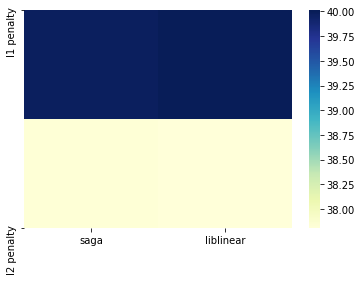

In [34]:
sns.heatmap(solver_df,cmap="YlGnBu")

liblinear with l1 penalty suits best

Trying to vary the thresholds to get the accurate threshold.

In [15]:
# Logistic Regression with tfdif vectorizer
classifier_15 = OneVsRestClassifier(LogisticRegression(max_iter=200,solver='liblinear',penalty='l1'))
classifier_15.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=200, penalty='l1',
                                                 solver='liblinear'))

In [19]:
thresholds=[0.1,0.2,0.25,0.3,0.4,0.5,0.6]
train_acc=[]
val_acc=[]

In [20]:
y_pred1 = classifier_15.predict_proba(xtrain_tfidf)
y_pred2 = classifier_15.predict_proba(xval_tfidf)
for i in thresholds:
    predictions_1 = (y_pred1 >= i).astype(int)
    predictions_2 = (y_pred2 >= i).astype(int)
    f1 = f1_score(ytrain, predictions_1, average='micro')
    f2 = f1_score(yval, predictions_2, average='micro')
    train_acc.append(f1)
    val_acc.append(f2)
    print("Micro-average quality numbers for threshold=",i)
    print(" F1-measure for train: {:.4f}".format( f1))
    print(" F1-measure for cv: {:.4f}".format( f2))

Micro-average quality numbers for threshold= 0.1
 F1-measure for train: 0.4762
 F1-measure for cv: 0.4550
Micro-average quality numbers for threshold= 0.2
 F1-measure for train: 0.5539
 F1-measure for cv: 0.5048
Micro-average quality numbers for threshold= 0.25
 F1-measure for train: 0.5639
 F1-measure for cv: 0.5081
Micro-average quality numbers for threshold= 0.3
 F1-measure for train: 0.5593
 F1-measure for cv: 0.4902
Micro-average quality numbers for threshold= 0.4
 F1-measure for train: 0.5085
 F1-measure for cv: 0.4284
Micro-average quality numbers for threshold= 0.5
 F1-measure for train: 0.4124
 F1-measure for cv: 0.3432
Micro-average quality numbers for threshold= 0.6
 F1-measure for train: 0.3126
 F1-measure for cv: 0.2609


Text(0.5, 1.0, 'Accuracy v/s Validation for training data')

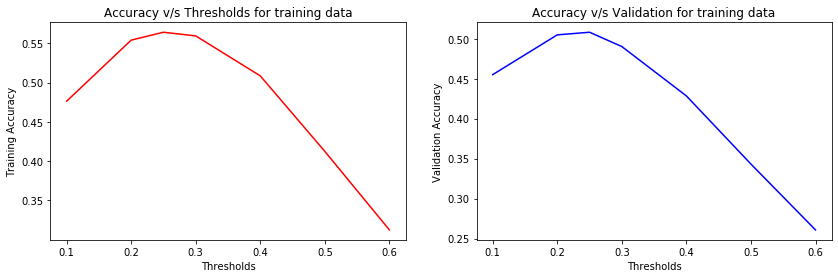

In [34]:
f = plt.figure(figsize=(14,4))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.plot(thresholds,train_acc , 'r')
ax.set_xlabel('Thresholds')
ax.set_ylabel('Training Accuracy')
ax.set_title('Accuracy v/s Thresholds for training data')
ax2.plot(thresholds,val_acc , 'b')
ax2.set_xlabel('Thresholds')
ax2.set_ylabel('Validation Accuracy')
ax2.set_title('Accuracy v/s Validation for training data')

Threshold 0.25 gives the maxima for accuracy.

Final Model-

<space>
    
    
Tfidf Vectorizer- min_df=0.01,ngram_range=(1,3)
    
</space>  
<space>
    
Logistic Regression- max_iter=200,solver='liblinear',penalty='l1', threshold= 0.25
</space>

In [12]:
# Logistic Regression with tfdif vectorizer
classifier_16 = OneVsRestClassifier(LogisticRegression(max_iter=200,solver='liblinear',penalty='l1'))
classifier_16.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=200, penalty='l1',
                                                 solver='liblinear'))

Getting Accuracy on testing Data

In [13]:
xtest_tfidf = tfidf_vectorizer.transform(xtest)

In [17]:
y_pred = classifier_16.predict_proba(xtest_tfidf)
predictions = (y_pred >= 0.25).astype(int)

In [18]:
Acc = f1_score(ytest, predictions, average='micro')

In [21]:
print(" F1-measure for Test Data: {:.4f}".format(Acc))

 F1-measure for Test Data: 0.5192


In [59]:
def infer_tags(q):
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = classifier_16.predict_proba(q_vec)
    predictions = (q_pred >= 0.25).astype(int)
    ans=multilabel_binarizer.inverse_transform(predictions)
    return ans

In [63]:
for i in range(5): 
    k = xtest.sample(1).index[0]
    print("Movie: ", df['Title'][k], "\nPredicted genre: ", infer_tags(xtest[k])), print("Actual genre: ",df['Genres'][k], "\n")

Movie:  Attaboy Sam! 
Predicted genre:  [("Children's literature", 'Fiction')]
Actual genre:  ["Children's literature", 'Young adult literature'] 

Movie:  The Attack 
Predicted genre:  [('Fiction', 'Science Fiction', 'Speculative fiction')]
Actual genre:  ['Science Fiction', 'Speculative fiction', 'Novel'] 

Movie:  Peace Breaks Out 
Predicted genre:  [('Fiction', 'Novel')]
Actual genre:  ["Children's literature", 'Fiction', 'Novel'] 

Movie:  The Krillitane Storm 
Predicted genre:  [('Speculative fiction',)]
Actual genre:  ['Science Fiction'] 

Movie:  The King's Buccaneer 
Predicted genre:  [('Fantasy', 'Fiction', 'Science Fiction', 'Speculative fiction')]
Actual genre:  ['Fantasy'] 

